<a href="https://colab.research.google.com/github/KamilShape/workers_regression_project/blob/main/workers_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/KamilShape/data_bases.git

Cloning into 'data_bases'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 3), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (14/14), 8.16 MiB | 4.54 MiB/s, done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
workers = pd.read_csv('data_bases/workers.csv')

In [4]:
workers

,worker_id,first_name,last_name,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment,salary_gross
0,1,Martyna,Kalinowska,F,Poland,Administration,Executive,Trainee,March,2003,4800.0
1,2,Iwona,Kalinowska,F,Poland,Administration,Executive,Mid,April,2012,5800.0
2,3,Lidia,Lewandowska,F,Poland,Administration,Secretary,Manager,December,2012,6800.0
3,4,Bożena,Kalinowska,F,Poland,Administration,Executive,Mid,July,2016,5700.0
4,5,Anastazja,Kowalska,F,Poland,Administration,Executive,Mid,June,2013,5800.0
...,...,...,...,...,...,...,...,...,...,...,...
210,211,Ingrid,Jacobsen,F,Norway,Sales,Sales engineer,Senior,July,2007,12600.0
211,212,Ada,Lund,F,Norway,Sales,Sales engineer,Trainee,October,2007,9800.0
212,213,Tobias,Henriksen,M,Norway,Sales,Sales consultant,Senior,November,2005,13400.0
213,214,Johannes,Gundersen,M,Norway,Sales,Sales representative,Junior,November,2015,11400.0


In [5]:
#statistic data
#mean
salary_avg = workers['salary_gross'].mean()
#median
salary_median = workers['salary_gross'].median()
#standard deviation
salary_std = workers['salary_gross'].std()
#minimum and max salary value
salary_min = workers['salary_gross'].min()
salary_max = workers['salary_gross'].max()
print(f'Mean: {salary_avg}')
print(f'Median: {salary_median}')
print(f'Standard deviation: {salary_std}')
print(f'Max: {salary_max}')
print(f'Min: {salary_min}')

Mean: 10841.39534883721
Median: 9800.0
Standard deviation: 4436.436633889897
Max: 24200.0
Min: 4800.0


Histogram

(array([37., 50., 38., 25., 24., 15.,  5., 13.,  4.,  4.]),
 array([ 4800.,  6740.,  8680., 10620., 12560., 14500., 16440., 18380.,
        20320., 22260., 24200.]),
 <BarContainer object of 10 artists>)

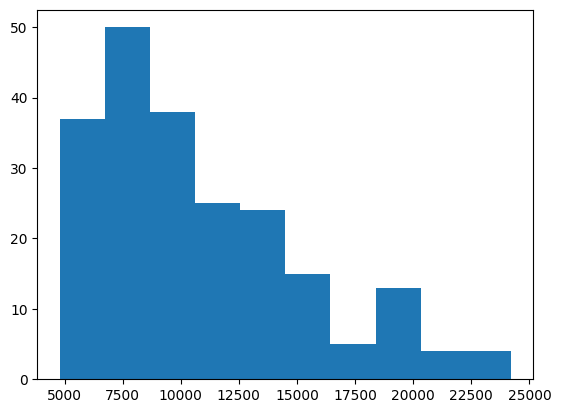

In [6]:
plt.hist(workers['salary_gross'])

In [7]:
from scipy import stats

In [8]:
#shapiro - wilka test
shapiro_test = stats.shapiro(workers['salary_gross'])
shapiro_test.pvalue
#p<0,05 - no bell curve

1.7257721640628887e-10

Changing data types

In [9]:
#changing [year_of_employment] to year
workers['year_of_employment'] = workers['year_of_employment'].apply(lambda x: pd.to_datetime(x, format='%Y').year)

Figures

In [10]:
#functions 
def mean_group_function(group_column, mean_column):
  df = pd.DataFrame(workers.groupby([group_column])[mean_column].mean()).reset_index().sort_values(by=mean_column, ascending=False)
  return df

def draw_bar_figure(data, x, y, size_x, size_y, color, alpha, title, y_label, lim=False, rot=False, **kwargs):
  fig, ax = plt.subplots(figsize=(size_x, size_y))
  ax.bar(data[x], data[y], color = color, alpha = alpha)
  ax.set_title(title)
  # ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  if rot:
     ax.xaxis.set_tick_params(rotation=90)
  if lim:
    ax.set_ylim(kwargs['low_lim'], kwargs['up_lim'])


In [11]:
#set fig style
plt.style.use('ggplot')

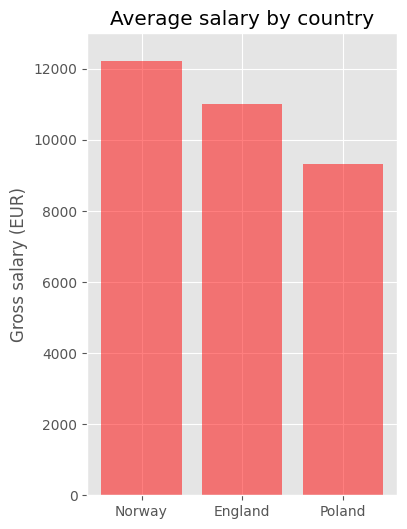

In [12]:
#average salary by country
mean_salary_by_country = mean_group_function('nationality', 'salary_gross')
draw_bar_figure(mean_salary_by_country, 'nationality', 'salary_gross', 4,6, 'r', 0.5, 'Average salary by country','Gross salary (EUR)', lim=True, low_lim = 0, up_lim =13000)

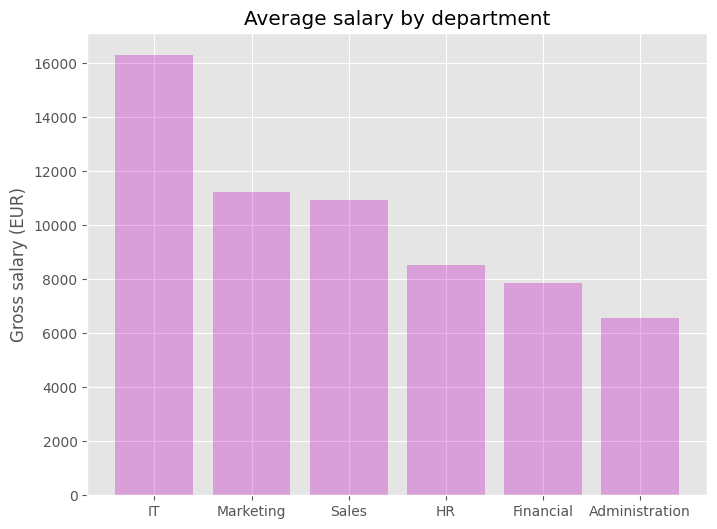

In [13]:
#average salary by department
mean_salary_by_department = mean_group_function('department', 'salary_gross')
draw_bar_figure(mean_salary_by_department, 'department', 'salary_gross', 8,6,'m', 0.3, 'Average salary by department', 'Gross salary (EUR)')

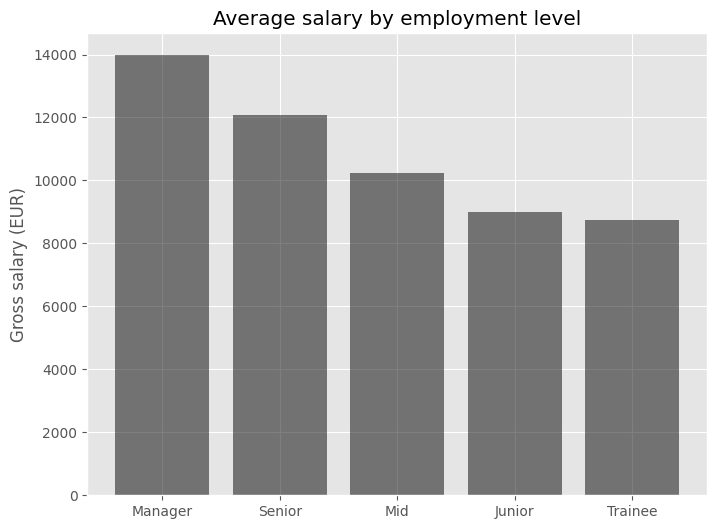

In [14]:
#average salary by employment_level
mean_salary_by_employment_level = mean_group_function('employment_level', 'salary_gross')
draw_bar_figure(mean_salary_by_employment_level, 'employment_level', 'salary_gross', 8,6,'k', 0.5, 'Average salary by employment level', 'Gross salary (EUR)', low_lim = 4000, up_lim =15000)

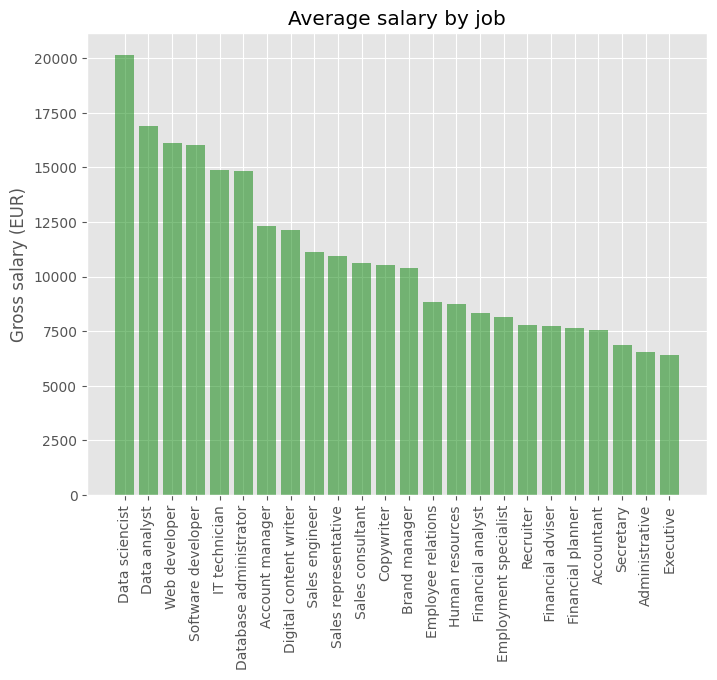

In [15]:
#average salary by job
mean_salary_by_job = mean_group_function('job', 'salary_gross')
draw_bar_figure(mean_salary_by_job, 'job', 'salary_gross', 8,6,'g', 0.5, 'Average salary by job','Gross salary (EUR)', rot=True)

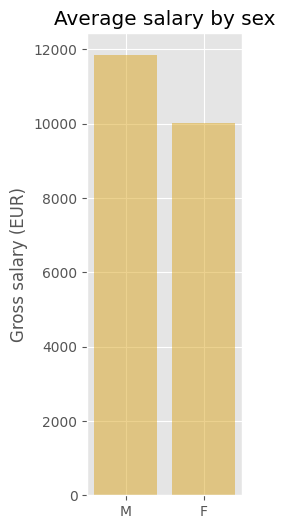

In [16]:
#average salary by sex
mean_salary_by_sex = mean_group_function('sex', 'salary_gross')
draw_bar_figure(mean_salary_by_sex, 'sex', 'salary_gross', 2,6,'goldenrod', 0.5, 'Average salary by sex','Gross salary (EUR)')

Corrected data


In [17]:
#outliners
# upper_value = salary_avg + 3*salary_std
# lower_value = salary_avg - 3*salary_std

upper_quantile = workers['salary_gross'].quantile(0.9)
lower_quantile = workers['salary_gross'].quantile(0.1)
workers2 = workers[(workers['salary_gross'] > lower_quantile) & (workers['salary_gross'] < upper_quantile)]
workers2

,worker_id,first_name,last_name,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment,salary_gross
2,3,Lidia,Lewandowska,F,Poland,Administration,Secretary,Manager,December,2012,6800.0
14,15,Violet,Murray,F,England,Administration,Administrative,Senior,February,2010,7400.0
15,16,Daisy,Rimmer,F,England,Administration,Secretary,Manager,December,2016,7700.0
16,17,Olivia,Murray,F,England,Administration,Administrative,Mid,January,2003,6500.0
17,18,Isabelle,Walsh,F,England,Administration,Administrative,Mid,August,2019,6800.0
...,...,...,...,...,...,...,...,...,...,...,...
210,211,Ingrid,Jacobsen,F,Norway,Sales,Sales engineer,Senior,July,2007,12600.0
211,212,Ada,Lund,F,Norway,Sales,Sales engineer,Trainee,October,2007,9800.0
212,213,Tobias,Henriksen,M,Norway,Sales,Sales consultant,Senior,November,2005,13400.0
213,214,Johannes,Gundersen,M,Norway,Sales,Sales representative,Junior,November,2015,11400.0


Histogram after using quantiles

<ipython-input-18-d90be968e7ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  h_plot = sns.distplot(workers2['salary_gross'])


Text(0.5, 0, 'Gross salary')

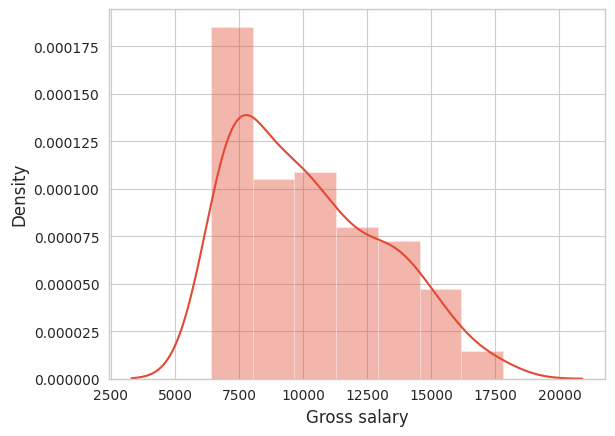

In [18]:
sns.set_style("whitegrid")
h_plot = sns.distplot(workers2['salary_gross'])
plt.rcParams['figure.figsize'] = (16, 10)
h_plot.set_xlabel('Gross salary')

Matching data to prediction models

In [19]:
workers2.iloc[:, 3:10]

,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment
2,F,Poland,Administration,Secretary,Manager,December,2012
14,F,England,Administration,Administrative,Senior,February,2010
15,F,England,Administration,Secretary,Manager,December,2016
16,F,England,Administration,Administrative,Mid,January,2003
17,F,England,Administration,Administrative,Mid,August,2019
...,...,...,...,...,...,...,...
210,F,Norway,Sales,Sales engineer,Senior,July,2007
211,F,Norway,Sales,Sales engineer,Trainee,October,2007
212,M,Norway,Sales,Sales consultant,Senior,November,2005
213,M,Norway,Sales,Sales representative,Junior,November,2015


In [21]:
for col in workers2.iloc[:, 3:10].columns:
  workers2[col] = workers2[col].astype('category')
  workers2[col] = workers2[col].cat.codes

<ipython-input-21-d4bff848bac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workers2[col] = workers2[col].astype('category')
<ipython-input-21-d4bff848bac1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workers2[col] = workers2[col].cat.codes
<ipython-input-21-d4bff848bac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [22]:
workers2

,worker_id,first_name,last_name,sex,nationality,department,job,employment_level,month_of_employment,year_of_employment,salary_gross
2,3,Lidia,Lewandowska,0,2,0,20,1,2,12,6800.0
14,15,Violet,Murray,0,0,0,5,3,3,10,7400.0
15,16,Daisy,Rimmer,0,0,0,20,1,2,16,7700.0
16,17,Olivia,Murray,0,0,0,5,2,4,3,6500.0
17,18,Isabelle,Walsh,0,0,0,5,2,1,19,6800.0
...,...,...,...,...,...,...,...,...,...,...,...
210,211,Ingrid,Jacobsen,0,1,5,2,3,5,7,12600.0
211,212,Ada,Lund,0,1,5,2,4,10,7,9800.0
212,213,Tobias,Henriksen,1,1,5,18,3,9,5,13400.0
213,214,Johannes,Gundersen,1,1,5,19,0,9,15,11400.0


Correlation matrix

<Axes: >

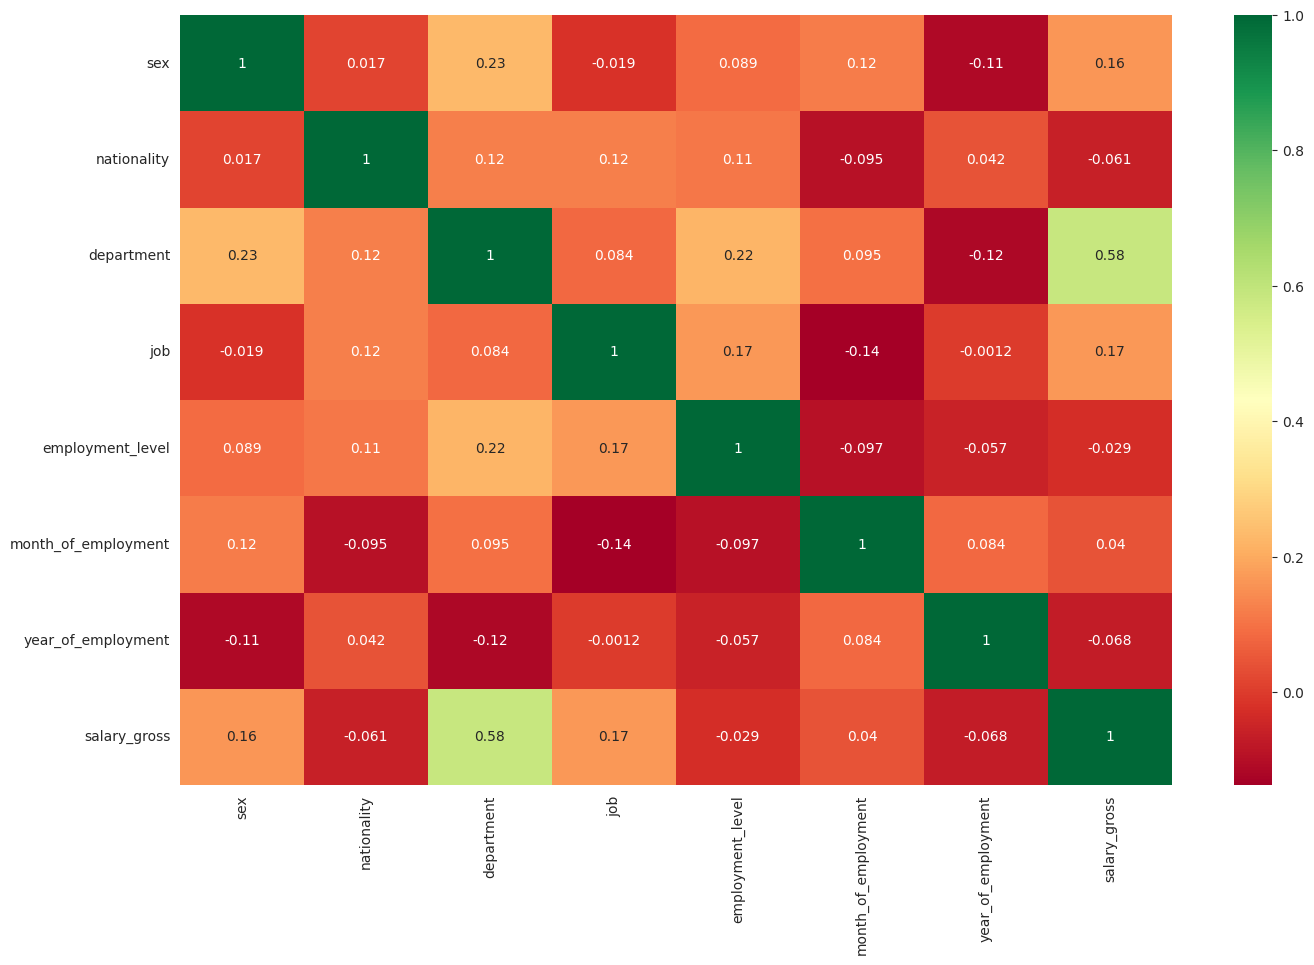

In [25]:
#utworzenie mapy korelacji
workers2_corr = workers2.iloc[:,3:].corr()
sns.heatmap(workers2_corr, cmap='RdYlGn', annot=True)